#  2.PANDAS 


In [2]:
import pandas as pd
import numpy as np

# Tạo DataFrame
data = {
    "ID": [101, 102, 103, 104, 105],
    "Name": ["Quynh Nhu", "Hoang Hai", None, "Phuong Tuan", "Thien An"],
    "Age": [26, 18, 20, None, 19],
    "Salary": [50000, 35000, 65000, 100000, None]
}
df = pd.DataFrame(data)

# 1. Điền giá trị thiếu trong cột Age bằng giá trị trung bình
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 2. Điền giá trị thiếu trong cột Name bằng "Unknown" (phải làm trước khi xóa dòng)
df['Name'].fillna("Unknown", inplace=True)

# 3. Điền giá trị thiếu trong cột Salary bằng phương pháp nội suy (Interpolation)
df['Salary'] = df['Salary'].interpolate()

# 4. Loại bỏ các dòng chứa dữ liệu thiếu (sau khi đã điền giá trị cần thiết)
df.dropna(inplace=True)

# Hiển thị DataFrame sau khi xử lý
print(df)


    ID         Name    Age    Salary
0  101    Quynh Nhu  26.00   50000.0
1  102    Hoang Hai  18.00   35000.0
2  103      Unknown  20.00   65000.0
3  104  Phuong Tuan  20.75  100000.0
4  105     Thien An  19.00  100000.0


/var/folders/98/hc11q96n679__mg9l42b0gvw0000gn/T/ipykernel_70460/3783610747.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/98/hc11q96n679__mg9l42b0gvw0000gn/T/ipykernel_70460/3783610747.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [4]:
import pandas as pd

# Tạo df1 và df2
df1 = pd.DataFrame({
    "ID": [1, 2, 3],
    "ScoreA": [70, 90, 45]
})

df2 = pd.DataFrame({
    "ID": [3, 4, 5],
    "ScoreB": [62, 91, 75]
})

# Merge trên cột "ID" với các kiểu Join
inner_merge = pd.merge(df1, df2, on="ID", how="inner")  # Inner Join
left_merge = pd.merge(df1, df2, on="ID", how="left")    # Left Join
outer_merge = pd.merge(df1, df2, on="ID", how="outer")  # Outer Join

print(" Inner Join:\n", inner_merge)
print("\n Left Join:\n", left_merge)
print("\n Outer Join:\n", outer_merge)

#  Nối DataFrame theo chiều dọc
vertical_concat = pd.concat([df1, df2], axis=0, ignore_index=True)
print("\n Nối theo chiều dọc:\n", vertical_concat)

# Ghép df1 và df2, sau đó điền giá trị thiếu bằng 0
merged_df = pd.merge(df1, df2, on="ID", how="outer")
merged_df.fillna(0, inplace=True)

print("\n Ghép df1 và df2, điền giá trị thiếu:\n", merged_df)


 Inner Join:
    ID  ScoreA  ScoreB
0   3      45      62

 Left Join:
    ID  ScoreA  ScoreB
0   1      70     NaN
1   2      90     NaN
2   3      45    62.0

 Outer Join:
    ID  ScoreA  ScoreB
0   1    70.0     NaN
1   2    90.0     NaN
2   3    45.0    62.0
3   4     NaN    91.0
4   5     NaN    75.0

 Nối theo chiều dọc:
    ID  ScoreA  ScoreB
0   1    70.0     NaN
1   2    90.0     NaN
2   3    45.0     NaN
3   3     NaN    62.0
4   4     NaN    91.0
5   5     NaN    75.0

 Ghép df1 và df2, điền giá trị thiếu:
    ID  ScoreA  ScoreB
0   1    70.0     0.0
1   2    90.0     0.0
2   3    45.0    62.0
3   4     0.0    91.0
4   5     0.0    75.0


In [10]:
import pandas as pd
import numpy as np


data = pd.DataFrame({
    "ID": range(1, 1000001),  
    "Value": np.random.randint(1, 100, 1000000) 
})

# 1️⃣ Tối ưu hóa bộ nhớ bằng cách thay đổi kiểu dữ liệu
data["ID"] = data["ID"].astype(np.uint32)  # Sử dụng uint32 thay vì int64 để tiết kiệm bộ nhớ
data["Value"] = data["Value"].astype(np.uint8)  # Sử dụng uint8 vì giá trị chỉ từ 1-99

# 2️⃣ Tìm 5 giá trị phổ biến nhất trong cột "Value"
top_values = data["Value"].value_counts().head(5)

# 3️⃣ Sử dụng query để lọc dữ liệu nhanh hơn
filtered_data = data.query("Value > 90")


print(" Bộ nhớ sau tối ưu hoá:")
print(data.info(memory_usage="deep"))

print("\n 5 giá trị phổ biến nhất trong cột 'Value':")
print(top_values)

print("\n Số lượng dòng có 'Value' > 90:", len(filtered_data))


 Bộ nhớ sau tối ưu hoá:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ID      1000000 non-null  uint32
 1   Value   1000000 non-null  uint8 
dtypes: uint32(1), uint8(1)
memory usage: 4.8 MB
None

 5 giá trị phổ biến nhất trong cột 'Value':
Value
24    10387
54    10357
63    10295
43    10292
90    10284
Name: count, dtype: int64

 Số lượng dòng có 'Value' > 90: 90994


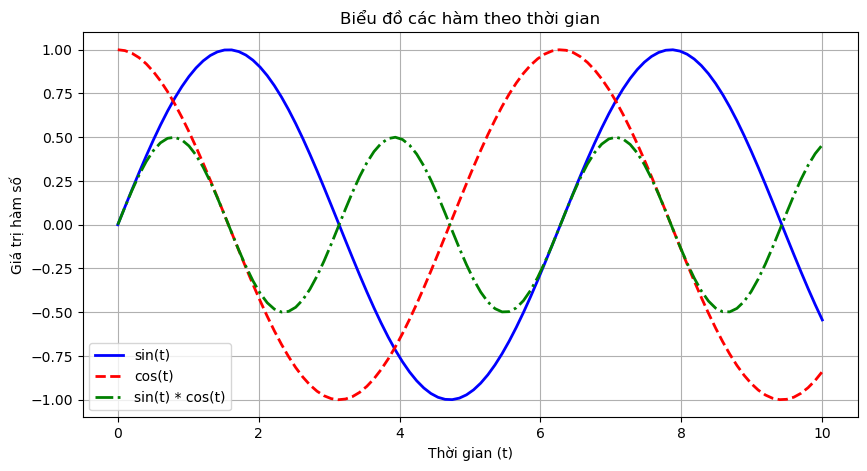

In [14]:
import matplotlib.pyplot as plt
import numpy as np


t = np.linspace(0, 10, 100)  
y1 = np.sin(t)
y2 = np.cos(t)
y3 = np.sin(t) * np.cos(t)

#Tạo biểu đồ các đường theo thời gian
plt.figure(figsize=(10, 5))  
plt.plot(t, y1, label="sin(t)", color="blue", linestyle="-", linewidth=2)
plt.plot(t, y2, label="cos(t)", color="red", linestyle="--", linewidth=2)
plt.plot(t, y3, label="sin(t) * cos(t)", color="green", linestyle="-.", linewidth=2)

plt.title("Biểu đồ các hàm theo thời gian")
plt.xlabel("Thời gian (t)")
plt.ylabel("Giá trị hàm số")
plt.legend() 
plt.grid(True)  
plt.show()


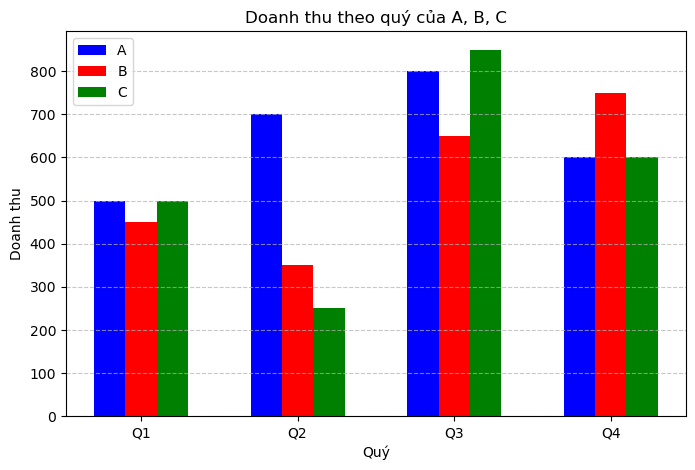

In [ ]:
#Biểu đồ cột nhóm
import numpy as np
import matplotlib.pyplot as plt


labels = ["Q1", "Q2", "Q3", "Q4"]
A = [500, 700, 800, 600]
B = [450, 350, 650, 750]
C = [500, 250, 850, 600]

#  Vẽ biểu đồ thành nhóm thể hiện doanh thu của A,B,C trong 4 quý
x = np.arange(len(labels)) 
width = 0.2  
plt.figure(figsize=(8, 5))
plt.bar(x - width, A, width, label="A", color="blue")
plt.bar(x, B, width, label="B", color="red")
plt.bar(x + width, C, width, label="C", color="green")
plt.xlabel("Quý")
plt.ylabel("Doanh thu")
plt.title("Doanh thu theo quý của A, B, C")
plt.xticks(x, labels)  
plt.legend()  
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()


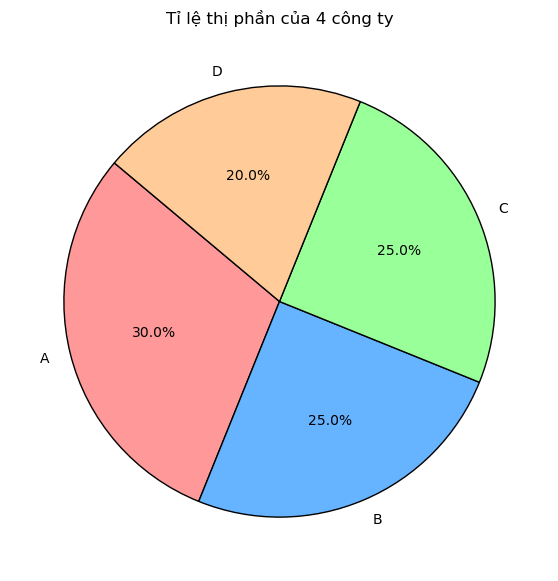

In [18]:
#Biểu đồ tròn
import matplotlib.pyplot as plt

Cty = ["A", "B", "C", "D"]
thiphan = [30, 25, 25, 20]
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

#Tạo biểu đồ tròn biểu hiện tỉ lệ thị phần của 4 công ty
plt.figure(figsize=(7, 7))
plt.pie(thiphan, labels=Cty, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Tỉ lệ thị phần của 4 công ty")
plt.show()


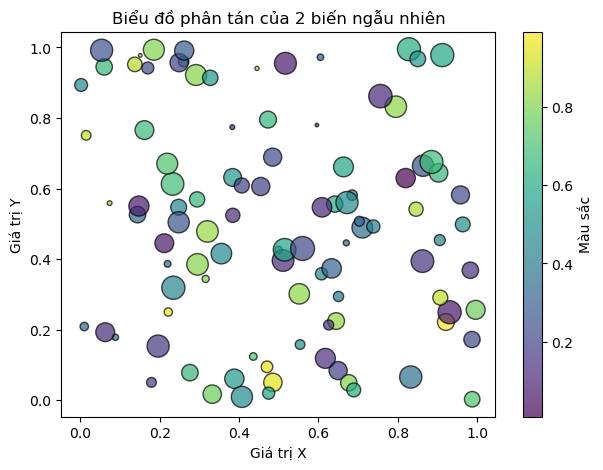

In [19]:
#Biểu đồ phân tán
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)  
y = np.random.rand(100)
sizes = np.random.rand(100) * 300  
colors = np.random.rand(100)  

#Tạo các biểu đồ phân tán của 2 biến ngẫu nhiên
plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=sizes, c=colors, alpha=0.7, cmap="viridis", edgecolors="black")
plt.title("Biểu đồ phân tán của 2 biến ngẫu nhiên")
plt.xlabel("Giá trị X")
plt.ylabel("Giá trị Y")
plt.colorbar(label="Màu sắc")  
plt.show()


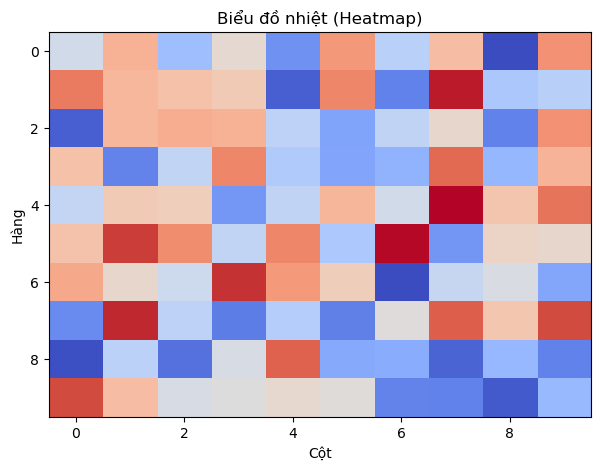

In [20]:
#Biểu đồ nhiệt
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(10, 10)
#Vẽ 1 heatmap thể hiện sự phân bố của dữ liệu trên ma trận
plt.figure(figsize=(7, 5))
plt.imshow(data, cmap="coolwarm", aspect="auto")  
plt.title("Biểu đồ nhiệt (Heatmap)")
plt.xlabel("Cột")
plt.ylabel("Hàng")
plt.show()
